# (PSL) Coding Assignment 2


## Part I: Implement Lasso

In [663]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Load Data

In [664]:
myData = pd.read_csv("Coding2_Data.csv")
var_names = myData.columns
y = myData[['Y']].to_numpy()
X = myData.drop(['Y'], axis = 1).to_numpy()

In [675]:
X.shape, len(y)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,Y
0,-5.064036,1.8,0.837248,0,-0.619897,1.883275,3.432567,1.408545,0.000000,5.690359,0.454865,3.9690,2.231591,3.178054
1,-3.600502,0.0,1.955860,0,-0.757153,1.859574,5.529585,1.602836,0.693147,5.488938,1.236450,3.9690,3.023243,3.072693
2,-3.601235,0.0,1.955860,0,-0.757153,1.971996,2.918119,1.602836,0.693147,5.488938,1.236450,3.9283,2.007486,3.546740
3,-3.430523,0.0,0.779325,0,-0.780886,1.945624,1.419592,1.802073,1.098612,5.402677,1.772241,3.9463,1.714643,3.508556
4,-2.672924,0.0,0.779325,0,-0.780886,1.966693,2.162710,1.802073,1.098612,5.402677,1.772241,3.9690,2.308679,3.589059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,2.479056,0,-0.556870,1.886008,3.969128,0.907694,0.000000,5.609472,4.447067,3.9199,3.109662,3.109061
502,-3.095111,0.0,2.479056,0,-0.556870,1.811562,5.152149,0.827460,0.000000,5.609472,4.447067,3.9690,3.013304,3.025291
503,-2.800824,0.0,2.479056,0,-0.556870,1.942476,7.899571,0.773574,0.000000,5.609472,4.447067,3.9690,2.374868,3.173878
504,-2.211009,0.0,2.479056,0,-0.556870,1.916040,7.535788,0.870833,0.000000,5.609472,4.447067,3.9345,2.545584,3.091042


In [666]:
#print(X)

#print(y)
# from scipy import stats
# stats.describe(X)

### CD for Lasso

In [667]:
def one_var_lasso(r, x, lam):

    #################
    # Your CODE
    #################

    beta = 0

    a = np.dot(r.T, x)/np.dot(x.T, x)
    eta = (2*len(r)*lam)/np.dot(x.T, x)
    
    #eta = lam
    #eta = (lam)/(np.mean(x * x)/2)
    #print("np.dot(x.T, x)/2/len(r)=" + str(( np.dot(x.T, x)/2/len(r) )) + ";np.var(x)/2=" + str( np.var(x)/2 ))
    #eta = (lam)/np.var(x)/2
    
    #print("np.dot(x.T, x)=", np.dot(x.T, x))
    
    #a = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), r)
    #eta = np.linalg.inv(np.matmul(x.T, x))*(2*len(r)*lam)
    #eta = lam

    if a > eta/2:
      beta = a - eta/2
    elif a < - eta/2:
      beta = a + eta/2
    elif abs(a) <= eta/2:
      beta = 0
    
    #print(beta)

    return beta

In [668]:
def MyLasso(X, y, lam_seq, maxit = 100):

    # Input
    # X: n-by-p design matrix without the intercept
    # y: n-by-1 response vector
    # lam.seq: sequence of lambda values (arranged from large to small)
    # maxit: number of updates for each lambda

    # Output
    # B: a (p+1)-by-len(lam.seq) coefficient matrix
    #    with the first row being the intercept sequence


    n, p = X.shape
    nlam = len(lam_seq)
    B = np.zeros((p+1, nlam))

    ##############################
    # YOUR CODE:
    # (1) newX = Standardizad X;
    # (2) Record the centers and scales used in (1)
    ##############################

    newX = (X - X.mean(axis=0)) / X.std(axis=0)


    # Initilize coef vector b and residual vector r
    b = np.zeros(p)
    r = y


    # Triple nested loop
    for m in range(nlam):
        for step in range(maxit):
            for j in range(p):
                X_j = newX[:, j].reshape(-1,1)
                r = r + X_j * b[j]
                b[j] = one_var_lasso(r, X_j, lam_seq[m])
                r = r - X_j * b[j]
        B[1:, m] = b

    ##############################
    # YOUR CODE:
    # Scale back the coefficients;
    # Update the intercepts stored in B[, 0]
    ##############################

    orginal_b = B[1:, :].copy()

    B[1:, :] = B[1:, :]/X.std(axis=0).reshape(-1,1)

    B[0,:] = np.full(len(lam_seq), y.mean()) - (np.dot(X.mean(axis=0)/X.std(axis=0),orginal_b))

    return(B)

In [669]:
log_lam_seq = np.linspace(-1, -8, num = 80)
#print("log_lam_seq", log_lam_seq)
lam_seq = np.exp(log_lam_seq)
#print("lam_seq", lam_seq)
myout = MyLasso(X, y, lam_seq, maxit = 100)

(-8.35, -0.6499999999999999, -0.30999458351284664, 0.4997421988480475)

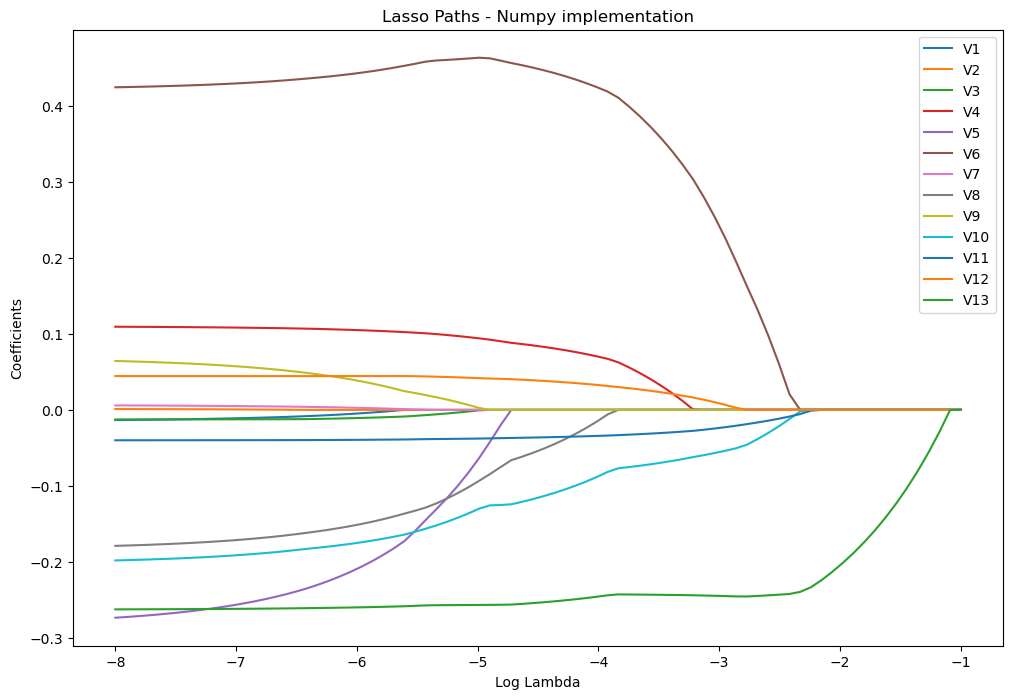

In [670]:
p, _ = myout.shape
plt.figure(figsize = (12,8))

for i in range(p-1):
    plt.plot(log_lam_seq, myout[i+1, :], label = var_names[i])

plt.xlabel('Log Lambda')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

### Check the Accuracy

Compare the accuracy of your algorithm against the output from glmnet. The maximum difference between the two coefficient matrices should be less than 0.005.

In [671]:
lasso_coef = pd.read_csv("Coding2_lasso_coefs.csv").to_numpy()
lasso_coef.shape

(14, 80)

In [672]:
abs(myout - lasso_coef).max()

0.0046453174159237776